In [29]:
import pandas as pd
pd.set_option('display.max_rows', None)

train_df = pd.read_csv('./titanic/train.csv')

print(train_df.isna().sum())
print(train_df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [31]:
train_df['Embarked'] = pd.Categorical(train_df['Embarked'], categories=['S', 'Q', 'C', 'Unknown'], ordered=False)
train_df['Embarked'] = train_df['Embarked'].fillna('Unknown')
train_df['Sex'] = pd.Categorical(train_df['Sex'], categories=['male', 'female'], ordered=False)
train_df['Pclass'] = pd.Categorical(train_df['Pclass'], categories=[3, 2, 1], ordered=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


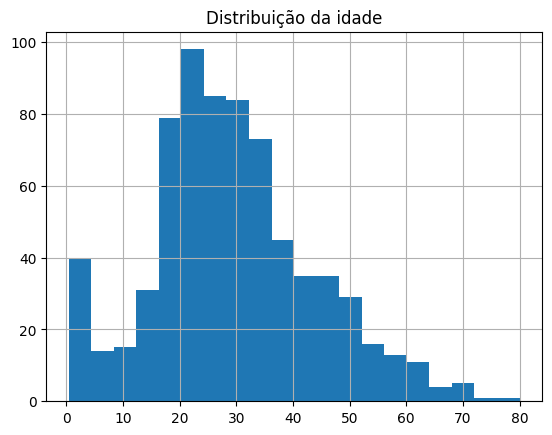

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_17680\2254267220.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_sex = train_df.groupby('Sex')['Pclass'].value_counts().reset_index()


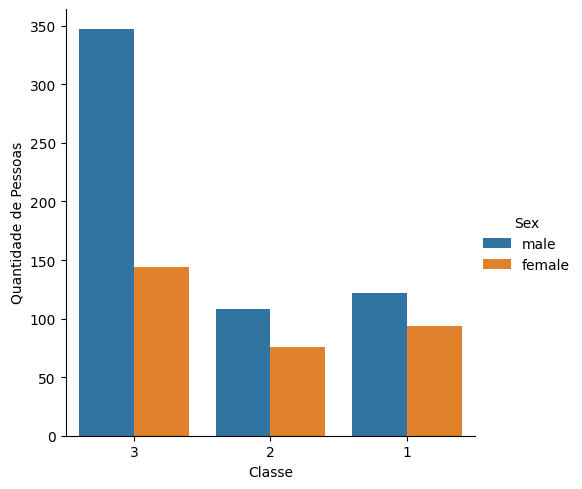

Embarked
S          0.722783
C          0.188552
Q          0.086420
Unknown    0.002245
Name: proportion, dtype: float64


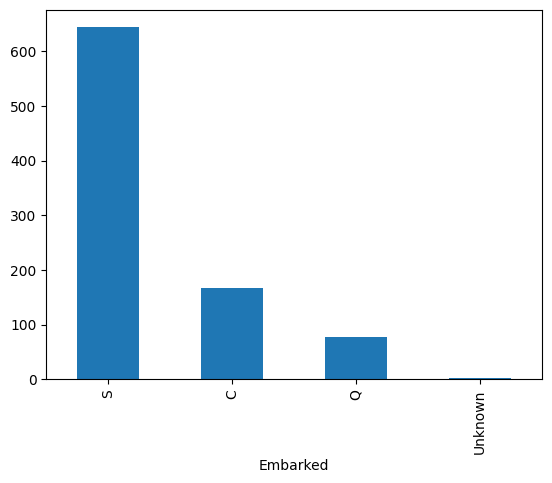

C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_17680\2254267220.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_embarked = train_df.groupby('Embarked')['Pclass'].value_counts().reset_index()


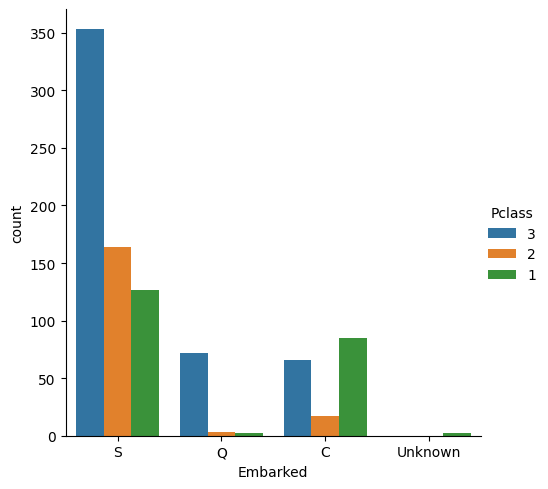

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Idade, Pclass, Sex, Fare, Embarked 

# Mais pessoas embarcadas entre 20 e 30 anos.
# Aproximadamente 2x mais pessoas embarcadas na terceira classe do que na primeira e segunda classe.
# Existem aproximadamente 2x mais homens na terceira classe do que nas outras.
# 70% das pessoas embarcaram em Southampton


train_df['Age'].hist(bins=20)
plt.title('Distribuição da idade')
plt.show()

grouped_by_sex = train_df.groupby('Sex')['Pclass'].value_counts().reset_index()
class_sex = sns.catplot(
    data=grouped_by_sex,
    kind='bar',
    x='Pclass', y='count',
    hue='Sex',
    
)
class_sex.set_axis_labels("Classe", "Quantidade de Pessoas")
plt.show()

train_df['Embarked'].value_counts().plot(kind='bar')
print(train_df['Embarked'].value_counts(normalize=True))
plt.show()

grouped_by_embarked = train_df.groupby('Embarked')['Pclass'].value_counts().reset_index()
embarked_class = sns.catplot(
    data=grouped_by_embarked,
    kind='bar',
    x='Embarked', y='count',
    hue='Pclass'
)
plt.show()

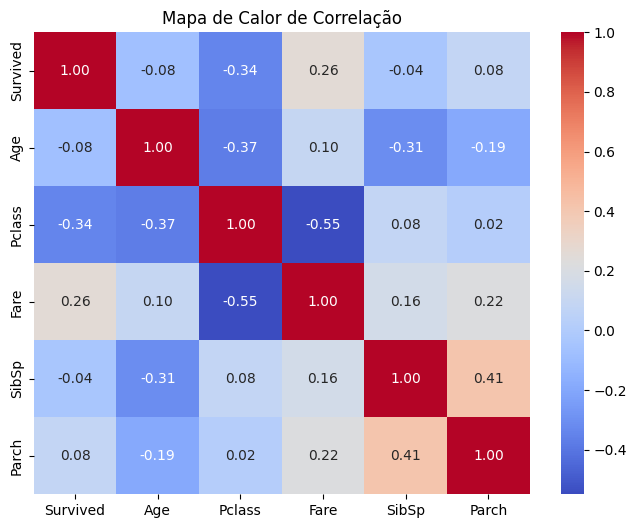

In [83]:
# Sex, Cabin, Embarked e Ticket foram removidos da matriz de correlação por serem categóricas.

train_df_dummy = pd.get_dummies(train_df, columns=['Sex', 'Cabin', 'Embarked',  'Ticket'], drop_first=True)

matrix_corr = train_df_dummy[['Survived', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()
